In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
volume_file_name = 'Data/volume_data.pkl'
one_way_volume_df = pd.read_pickle(volume_file_name)

In [3]:
pd.set_option('display.max_columns', None)
one_way_volume_df

,station_id,dir_of_travel,datetime,lane_x,lane_1,lane_2,lane_3,lane_4,total
0,8,1,2012-07-02 00:00:00,0,0,0,0,0,0
1,8,1,2012-07-02 01:00:00,0,0,0,0,0,0
2,8,1,2012-07-02 02:00:00,0,0,0,0,0,0
3,8,1,2012-07-02 03:00:00,2,0,0,0,0,2
4,8,1,2012-07-02 04:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
25576843,6224,7,2021-02-27 19:00:00,0,235,7,0,0,242
25576844,6224,7,2021-02-27 20:00:00,0,224,6,0,0,230
25576845,6224,7,2021-02-27 21:00:00,0,165,3,0,0,168
25576846,6224,7,2021-02-27 22:00:00,0,130,1,0,0,131


In [4]:
one_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25576848 entries, 0 to 25576847
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   station_id     category      
 1   dir_of_travel  category      
 2   datetime       datetime64[ns]
 3   lane_x         int16         
 4   lane_1         int16         
 5   lane_2         int16         
 6   lane_3         int16         
 7   lane_4         int16         
 8   total          int16         
dtypes: category(2), datetime64[ns](1), int16(6)
memory usage: 536.6 MB


In [5]:
one_way_volume_df.describe()

,lane_x,lane_1,lane_2,lane_3,lane_4,total
count,2.557685e+07,2.557685e+07,2.557685e+07,2.557685e+07,2.557685e+07,2.557685e+07
mean,5.634480e+02,1.367444e+01,6.562003e+00,5.892020e-01,2.335735e-01,5.842736e+02
std,1.014878e+03,7.589667e+01,5.544583e+01,1.546331e+01,1.024269e+01,1.011423e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01
50%,1.240000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02
75%,6.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.600000e+02
max,1.029000e+04,5.196000e+03,3.841000e+03,1.841000e+03,1.636000e+03,1.029000e+04


In [6]:
one_way_volume_df.drop(['lane_x', 'lane_1', 'lane_2', 'lane_3', 'lane_4'], axis=1, inplace=True)
one_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25576848 entries, 0 to 25576847
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   station_id     category      
 1   dir_of_travel  category      
 2   datetime       datetime64[ns]
 3   total          int16         
dtypes: category(2), datetime64[ns](1), int16(1)
memory usage: 292.7 MB


In [7]:
two_way_volume_df = one_way_volume_df.groupby(['station_id', 'datetime'], as_index=False, sort=False, observed=True).sum()
two_way_volume_df

,station_id,datetime,total
0,8,2012-07-02 00:00:00,4
1,8,2012-07-02 01:00:00,0
2,8,2012-07-02 02:00:00,0
3,8,2012-07-02 03:00:00,6
4,8,2012-07-02 04:00:00,0
...,...,...,...
12791851,6224,2021-02-27 19:00:00,505
12791852,6224,2021-02-27 20:00:00,480
12791853,6224,2021-02-27 21:00:00,358
12791854,6224,2021-02-27 22:00:00,231


In [8]:
current_stations_file = 'Data/Current_CC_StationList.xlsx'
current_df = pd.read_excel(current_stations_file)
current_stations = current_df['Continuous Number'].values

In [56]:
current_df

,Continuous Number,Sequence Number,Collection Type,Route,Pos Dir Dir,Pos Lanes,Neg Lanes,Urban/Rural,Functional Class,County Name,Location Text
0,26,5707,WIM,I-35,North,2,2,Rural,Interstate,Steele,"3.5 MI N OF TH30, N OF ELLENDALE"
1,27,9830,WIM,TH 60,East,2,2,Rural,Principal Arterial - Other,Watonwan,"0.7 MI W OF W JCT OF TH4, SW OF ST JAMES"
2,28,22993,"ATR Volume, Speed, Class",MSAS 114,East,1,1,Urban,Minor Arterial,Stearns,W OF 20TH AVE N IN ST CLOUD
3,29,69377,WIM,TH 53,North,2,2,Rural,Principal Arterial - Other,Saint Louis,"3 MI S OF CSAH59 (MELRUDE RD), S OF EVELETH"
4,30,6757,WIM,TH 61,North,2,2,Rural,Principal Arterial - Other,Lake,"SW OF CSAH25, SW OF TWO HARBORS"
...,...,...,...,...,...,...,...,...,...,...,...
99,4820,4820,"ATR Volume, Speed, Length",I-90,East,2,2,Rural,Interstate,Rock,"W OF CSAH 4, W OF BEAVER CREEK"
100,4910,4910,"ATR Volume, Speed, Length",TH 53,North,2,2,Rural,Principal Arterial - Other,Saint Louis,"N OF CSAH8 (DULUTH SAINT VINCENT RD), NW OF HE..."
101,5984,5984,"ATR Volume, Speed, Length",TH 61,North,2,2,Rural,Principal Arterial - Other,Wabasha,".9 MI SE OF CSAH18, S OF KELLOGG"
102,6067,6067,"ATR Volume, Speed, Length",TH 10,East,2,2,Rural,Principal Arterial - Other,Wadena,".3 MI E OF 141ST AVE, W OF VERNDALE"


In [55]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Continuous Number  104 non-null    int64 
 1   Sequence Number    104 non-null    int64 
 2   Collection Type    104 non-null    object
 3   Route              104 non-null    object
 4   Pos Dir Dir        104 non-null    object
 5   Pos Lanes          104 non-null    int64 
 6   Neg Lanes          104 non-null    int64 
 7   Urban/Rural        104 non-null    object
 8   Functional Class   104 non-null    object
 9   County Name        104 non-null    object
 10  Location Text      104 non-null    object
dtypes: int64(4), object(7)
memory usage: 9.1+ KB


In [9]:
active_stations = two_way_volume_df.station_id.isin(current_stations)
two_way_volume_df = two_way_volume_df[active_stations]
two_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11267376 entries, 135888 to 12791855
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   station_id  category      
 1   datetime    datetime64[ns]
 2   total       int16         
dtypes: category(1), datetime64[ns](1), int16(1)
memory usage: 204.2 MB


In [10]:
two_way_volume_df.reset_index(drop=True, inplace=True)
two_way_volume_df

,station_id,datetime,total
0,26,2007-01-01 00:00:00,92
1,26,2007-01-01 01:00:00,69
2,26,2007-01-01 02:00:00,70
3,26,2007-01-01 03:00:00,55
4,26,2007-01-01 04:00:00,93
...,...,...,...
11267371,6224,2021-02-27 19:00:00,505
11267372,6224,2021-02-27 20:00:00,480
11267373,6224,2021-02-27 21:00:00,358
11267374,6224,2021-02-27 22:00:00,231


In [11]:
two_way_volume_df = two_way_volume_df.pivot(index='datetime', columns='station_id', values='total')
two_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167904 entries, 2002-01-01 00:00:00 to 2021-02-28 23:00:00
Columns: 101 entries, 26 to 6224
dtypes: float64(101)
memory usage: 130.7 MB


In [12]:
two_way_volume_df.describe()

station_id,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,495,949,1335,1604,1940,3467,3790,3801,4820,4910,5984,6224
count,104520.000000,36648.000000,149016.000000,91176.000000,20088.000000,77520.000000,61128.000000,97056.000000,95736.000000,104568.000000,4320.000000,87360.000000,87840.000000,70128.000000,66792.000000,70752.000000,68328.000000,51240.000000,53472.000000,37680.000000,5712.000000,24456.000000,24336.000000,152640.000000,127584.000000,148152.000000,165528.000000,150504.000000,151608.000000,160464.000000,156432.000000,166128.000000,164016.000000,140904.000000,154584.000000,147792.000000,166248.000000,165792.000000,147408.000000,166512.000000,155328.000000,147408.000000,153600.000000,165912.000000,149016.000000,164376.000000,115536.000000,163248.000000,149016.000000,76032.000000,75672.000000,73968.000000,74544.000000,71208.000000,65424.000000,148944.000000,148848.000000,149760.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,147552.000000,149616.000000,150384.000000,130896.000000,160056.000000,162048.000000,152808.000000,138768.000000,165360.000000,97944.000000,156168.000000,167256.000000,163752.000000,162480.000000,149784.000000,167016.000000,136728.000000,143952.000000,149784.000000,144288.000000,167520.000000,166800.000000,162216.000000,167784.000000,167424.000000,159936.000000,18048.000000,16032.000000,10680.000000,10944.000000,18216.000000,8736.000000,7752.000000,12504.000000,15864.000000,15864.000000,16080.000000,16248.000000
mean,823.911232,241.110702,381.588085,333.606278,338.690114,221.716164,1174.177496,203.219245,127.452735,232.416179,1250.282639,1235.480552,429.716314,2260.163758,18.738621,1293.280755,673.373932,39.733236,513.389194,17.003105,777.965511,15.519096,433.561391,20.231473,1875.224801,1060.105061,378.653756,933.931802,91.538118,866.575288,1797.113794,109.686001,60.910405,1753.402338,427.829523,1272.211426,25.919295,47.583116,155.139640,900.340564,16.618066,35.730415,144.886172,80.979531,124.687282,71.701812,179.366977,117.147003,383.140529,31.251289,44.392444,103.098137,12.693510,14.467167,55.091174,6563.187587,5552.757786,4215.634495,3802.802063,4583.960894,6619.515409,5563.775018,3788.897875,1832.631784,3269.762532,2849.902643,4751.685231,580.102189,1434.571121,922.475643,3454.225837,1641.238661,448.706005,1191.248053,1271.019204,275.205628,800.074095,1783.754587,416.289733,77.326963,845.647445,3716.793863,751.435636,124.896054,1194.162836,935.845410,367.780146,230.926235,840.977666,912.176031,1172.179516,303.415356,334.972588,161.825209,381.082761,781.865841,591.790147,468.458081,262.303328,161.137811,482.407742
std,559.375188,173.731342,297.114162,257.386606,278.292391,162.298123,798.815427,147.640079,94.548808,168.918950,864.506523,898.620162,303.422281,1496.455941,17.920011,843.115232,505.498468,33.924150,377.628136,13.115321,687.808357,12.811987,312.886913,25.444168,1254.541245,844.319479,279.572572,675.917013,72.547895,669.144061,1210.053280,77.363442,45.917000,1142.668035,371.709436,819.336828,19.068106,35.324599,126.290995,679.794849,15.833076,28.483303,111.042497,71.996655,98.045274,82.863566,139.532882,90.078375,268.480025,26.660739,33.100503,76.261917,12.524174,13.566869,42.402450,3905.075709,3274.972490,2718.341657,2078.486155,2888.281694,3809.000746,3424.272999,2178.196086,1208.748019,2254.041004,1934.767326,2920.360088,401.532110,937.874072,602.250096,2213.196849,1039.967723,307.891991,799.976531,879.640645,194.501457,525.719478,1299.418985,319.044177,59.649373,709.174416,2396.984896,528.498666,92.614637,816.591108,645.254447,270.291585,173.447540,701.674081,658.026981,872.551437,213.149328,226.234683,121.744500,262.970807,570.748119,410.387708,338.220927,204.005255,129.19

In [82]:
two_way_volume_meta_df = pd.DataFrame()
two_way_volume_meta_df['missing_pct'] = two_way_volume_df.isna().mean()
two_way_volume_meta_df['first_data'] = two_way_volume_df.apply(lambda x: x.first_valid_index())
two_way_volume_meta_df['last_data'] = two_way_volume_df.apply(lambda x: x.last_valid_index())
two_way_volume_meta_df = two_way_volume_meta_df.merge(current_df[['Continuous Number', 'Functional Class']], 
                                                      left_index=True, right_on='Continuous Number')
two_way_volume_meta_df.rename({'Continuous Number': 'station_id', 'Functional Class': 'functional_class'}, 
                              axis=1, inplace=True)
two_way_volume_meta_df.set_index('station_id')

,missing_pct,first_data,last_data,functional_class
station_id,,,,
26,0.377501,2007-01-01,2021-02-28 23:00:00,Interstate
27,0.781732,2015-01-01,2021-02-12 23:00:00,Principal Arterial - Other
28,0.112493,2002-01-01,2018-12-31 23:00:00,Minor Arterial
29,0.456975,2007-01-01,2020-12-31 23:00:00,Principal Arterial - Other
30,0.880360,2007-01-01,2020-12-31 23:00:00,Principal Arterial - Other
...,...,...,...,...
3801,0.925529,2019-01-01,2021-02-28 23:00:00,Interstate
4820,0.905517,2019-01-01,2021-02-27 23:00:00,Interstate
4910,0.905517,2019-01-01,2021-02-27 23:00:00,Principal Arterial - Other


In [83]:
two_way_volume_meta_df.sort_values('missing_pct')

,missing_pct,first_data,last_data,station_id,functional_class
87,0.000715,2002-01-01,2021-02-28 23:00:00,458,Local
84,0.002287,2002-01-01,2021-02-28 23:00:00,410,Minor Arterial
88,0.002859,2002-01-01,2021-02-28 23:00:00,460,Major Collector
75,0.003859,2002-01-01,2021-02-28 23:00:00,384,Principal Arterial - Other
79,0.005289,2002-01-01,2021-02-28 23:00:00,390,Minor Arterial
...,...,...,...,...,...
92,0.936392,2019-01-01,2021-02-28 23:00:00,1335,Interstate
96,0.947970,2020-01-29,2021-02-27 23:00:00,3467,Interstate
97,0.953831,2019-01-01,2021-02-28 23:00:00,3790,Principal Arterial - Other
20,0.965981,2019-01-01,2020-11-30 23:00:00,47,Principal Arterial - Other


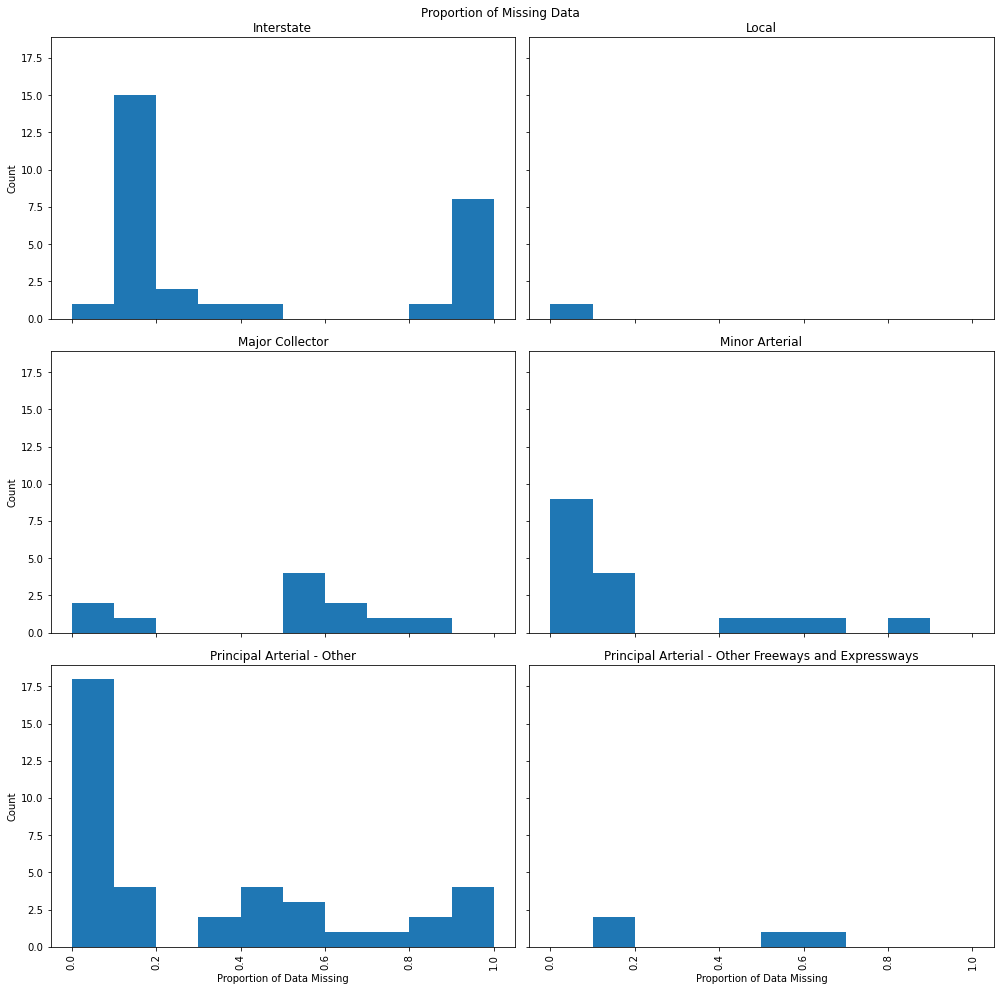

In [166]:
axs = two_way_volume_meta_df.hist(column='missing_pct', by='functional_class',
                            sharex=True, sharey=True, figsize=(14,14), range=(0,1));
for row in axs:
    for ax in row:
        ax.set_xlabel('Proportion of Data Missing')
        ax.set_ylabel('Count')
plt.suptitle('Proportion of Missing Data');
plt.tight_layout();

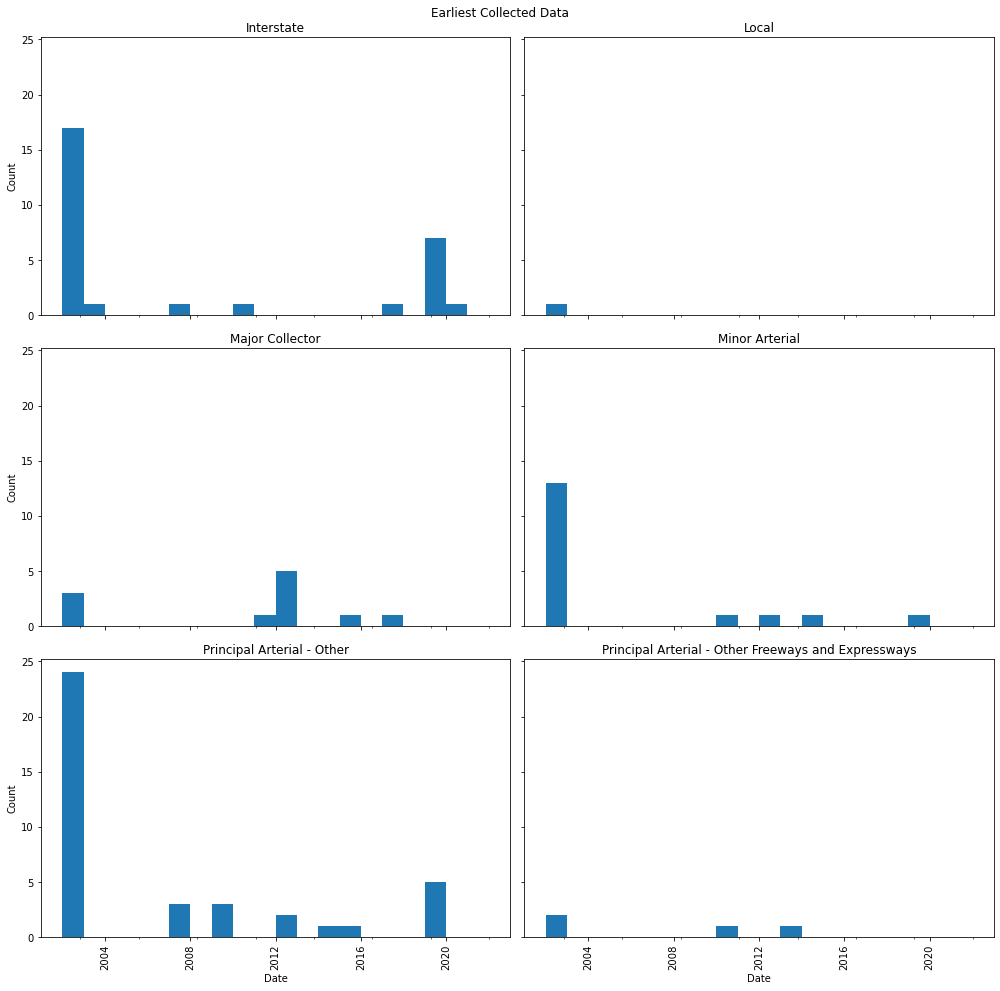

In [164]:
axs = two_way_volume_meta_df.hist(column='first_data', by='functional_class', bins=20,
                            sharex=True, sharey=True, figsize=(14,14), range=('2002-01-01','2021-12-31'));
for row in axs:
    for ax in row:
        ax.set_xlabel('Date')
        ax.set_ylabel('Count')
plt.suptitle('Earliest Collected Data');
plt.tight_layout();

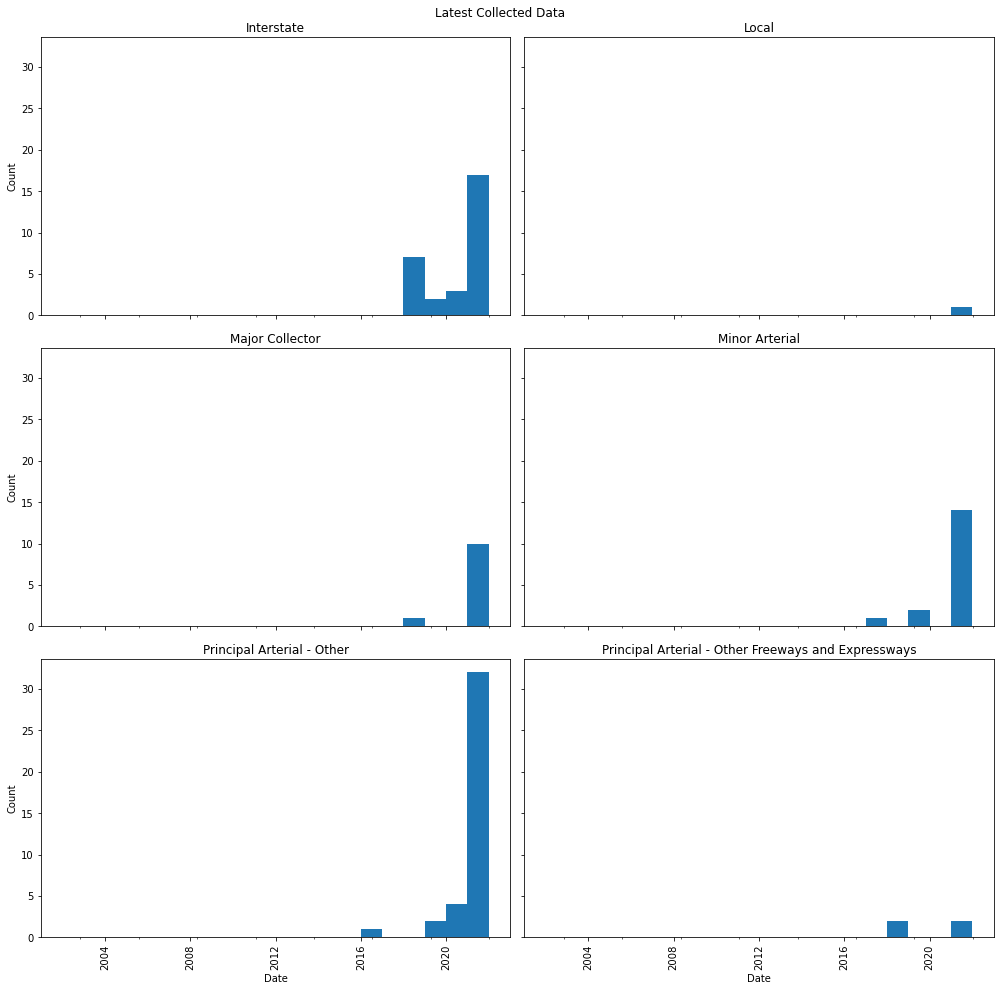

In [163]:
axs = two_way_volume_meta_df.hist(column='last_data', by='functional_class', bins=20,
                            sharex=True, sharey=True, figsize=(14,14), range=('2002-01-01','2021-12-31'));
for row in axs:
    for ax in row:
        ax.set_xlabel('Date')
        ax.set_ylabel('Count')
plt.suptitle('Latest Collected Data');
plt.tight_layout();

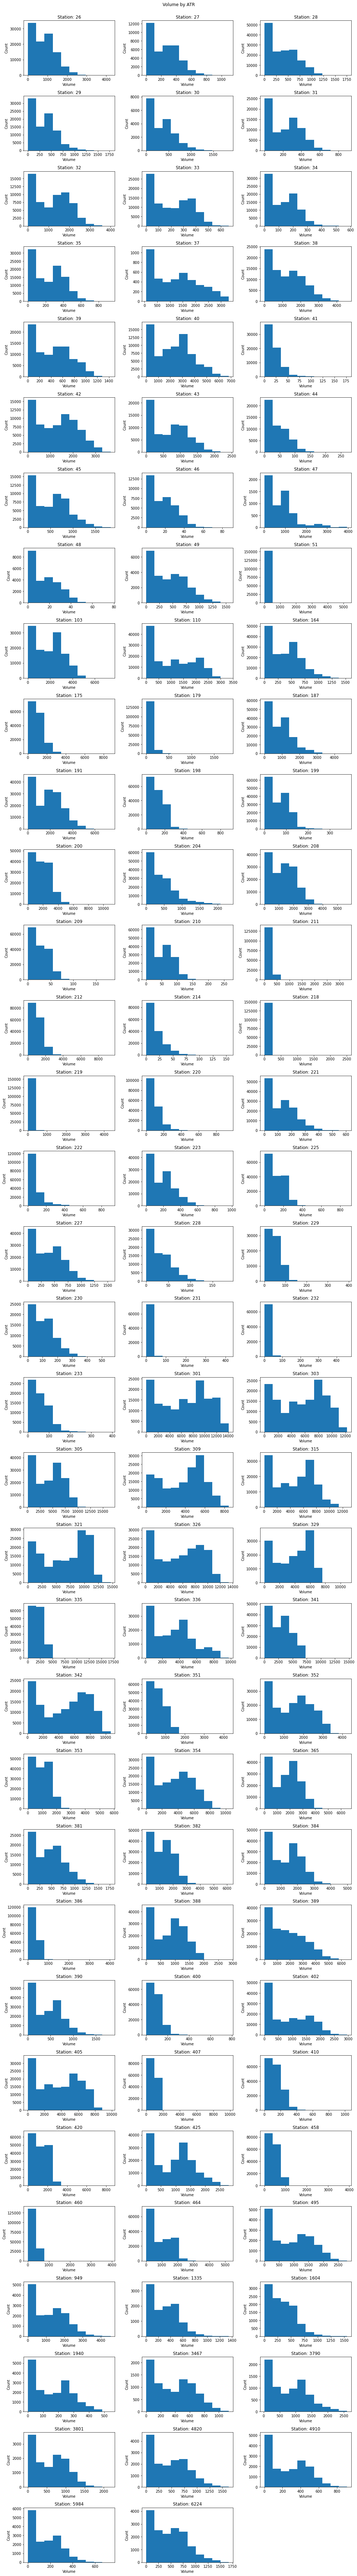

In [159]:
axs = two_way_volume_df.hist(layout=(34, 3), grid=False, sharex=False, sharey=False, figsize=(14,100));
for row in axs:
    for ax in row:
        ax.set_xlabel('Volume')
        ax.set_ylabel('Count')
        ax.set_title('Station: ' + ax.title.get_text())
plt.suptitle('Volume by ATR', y=1);
plt.tight_layout();

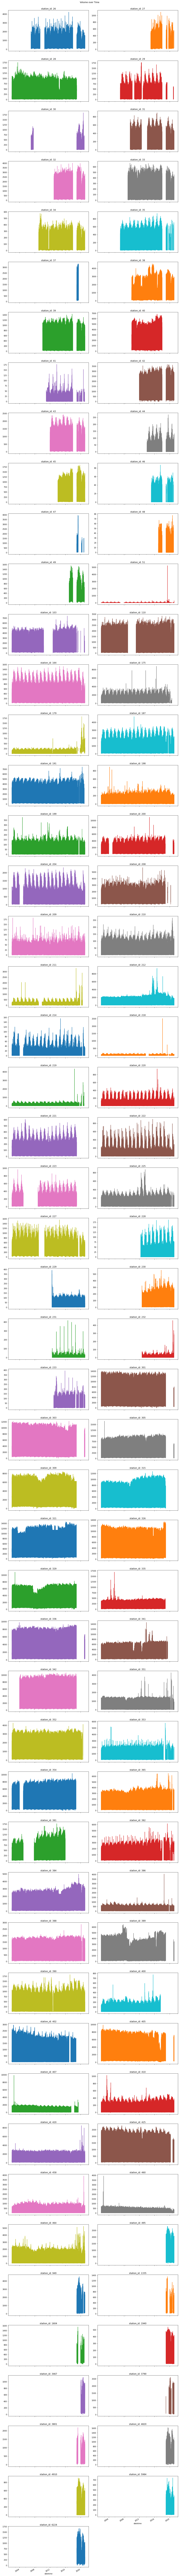

In [206]:
two_way_volume_df.plot(layout=(51, 2), subplots=True, legend=False, 
                       title=['station_id: ' + str(i) for i in two_way_volume_df.columns],
                       figsize=(14,200));
plt.suptitle('Volume over Time', y=1);
plt.tight_layout();